In [1]:
import numpy as np
import matplotlib.pyplot as plt
from iminuit import Minuit
from iminuit.cost import ExtendedBinnedNLL, LeastSquares
from scipy.stats import norm

E = [1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8, 8.5, 9]
errEn = 1/100
sigma=7

N=np.array([5.5, 5.5, 5, 5, 4, 4, 3, 5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 4])*100

for l in range(len(E)):
    #print(E[l])
    
    raw_data = np.loadtxt(r"C:\Users\lenovo\Desktop\AlfaRuth24-25_S1\curva_calibrazione\50mm2\curva_cal_50mm2_13-11-24_" +str(E[l]) +"MeV.dat")

    data1 = []

    for i in range(len(raw_data)):
        for j in range(int(raw_data[i])):
            data1.append(i)

    data = np.array(data1)

    signal = []


    for i in range(len(data)):
        if data[i] > np.array(raw_data).argmax()-75 and data[i] <np.array(raw_data).argmax()+75 : signal.append(data[i])


    #plt.hist(signal)
    #plt.show()
    
    N_ext=sum(raw_data)
    #print(N_ext)
    def model(x, N1, mu1, sigma1):
    	return N1*norm.cdf(x, loc = mu1, scale = sigma1)


    #bin_content, bin_edges,_ = plt.hist(signal, bins = 10)
    numbins=[]
    chi2=[]
    
    #c = int(np.ceil(1 + np.log(len(signal)/np.log(2))))
    
    for nbins in range(10, 100):
       
        bin_content, bin_edges = np.histogram(signal, bins = nbins)
        N_events = sum(bin_content)
    
        costf = ExtendedBinnedNLL(bin_content, bin_edges, model)
    
        my_minuit = Minuit(costf, N1 = N_events,  mu1 = np.array(raw_data).argmax(), sigma1 = sigma)
        my_minuit.migrad()
        
        
        #print(my_minuit.valid, my_minuit.fmin.reduced_chi2)
        if ((my_minuit.valid == True) and (my_minuit.fval/my_minuit.ndof > 0.9 )):
            chi2.append(my_minuit.fval/my_minuit.ndof)
            numbins.append(nbins)
            #display(my_minuit)

    
    index = np.array(chi2).argmin() #dove c'è il fit migliore


    
    nbins = numbins[index]
    
    bin_content, bin_edges = np.histogram(signal, bins = nbins)
    
    N_events = sum(bin_content)
    
    costf = ExtendedBinnedNLL(bin_content, bin_edges, model)
    
    my_minuit = Minuit(costf, N1 = N_events, mu1 = np.array(raw_data).argmax(), sigma1 = sigma)
    
    my_minuit.migrad()
    display(my_minuit)
    print(f"\n En = {E[l]}, bins = {nbins}, chi_2= {my_minuit.fmin.reduced_chi2:.1f}")

    
    ch1 = my_minuit.values['mu1']
    err_ch1 = max(1, my_minuit.errors['mu1'])
    fwhm = my_minuit.values['sigma1']
    errfwhm = my_minuit.errors['sigma1']
    #salva i dati che ci interessano in myfile.txt
    """with open("calibrazione_50mm2", "a") as f:
        f.write(f"{E[l]} {errEn} {ch1} {err_ch1} {fwhm} {errfwhm} {my_minuit.fmin.reduced_chi2:.1f}")
        f.write("\n")
        f.close()
        """
   

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 22.11 (χ²/ndof = 1.0)      │              Nfcn = 60               │
│ EDM = 1.34e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name   │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ N1     │  5.06e3   │  0.07e3   │            │            │         │         │       │
│ 1 │ mu1    │  949.99   │   0.05    │            │            │         │         │       │
│ 2 │ sigma1 │   3.72    │   0.04    │            │            │         │         │       │
└───┴────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────────┬────────────────────────────┐
│        │       N1      mu1   sigma1 │
├────────┼────────────────────────────┤
│     N1 │ 5.06e+03  -0.0022   0.0084 │
│    mu1 │  -0.0022  0.00276  -0.0000 │
│ sigma1 │   0.0084  -0.0000  0.00143 │
└────────┴────────────────────────────┘


 En = 1, bins = 26, chi_2= 1.0


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 42.51 (χ²/ndof = 1.5)      │              Nfcn = 61               │
│ EDM = 2.07e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name   │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ N1     │  5.07e3   │  0.07e3   │            │            │         │         │       │
│ 1 │ mu1    │ 1.39418e3 │ 0.00005e3 │            │            │         │         │       │
│ 2 │ sigma1 │   3.502   │   0.035   │            │            │         │         │       │
└───┴────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────────┬────────────────────────────┐
│        │       N1      mu1   sigma1 │
├────────┼────────────────────────────┤
│     N1 │ 5.07e+03  -0.0003   0.0009 │
│    mu1 │  -0.0003  0.00244  -0.0000 │
│ sigma1 │   0.0009  -0.0000  0.00123 │
└────────┴────────────────────────────┘


 En = 1.5, bins = 31, chi_2= 1.5


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 145.4 (χ²/ndof = 4.2)      │              Nfcn = 61               │
│ EDM = 3.96e-07 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name   │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ N1     │  5.07e3   │  0.07e3   │            │            │         │         │       │
│ 1 │ mu1    │ 1.84799e3 │ 0.00006e3 │            │            │         │         │       │
│ 2 │ sigma1 │   3.94    │   0.04    │            │            │         │         │       │
└───┴────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────────┬────────────────────────────┐
│        │       N1      mu1   sigma1 │
├────────┼────────────────────────────┤
│     N1 │ 5.07e+03   0.0000   0.0001 │
│    mu1 │   0.0000  0.00309   0.0000 │
│ sigma1 │   0.0001   0.0000  0.00155 │
└────────┴────────────────────────────┘


 En = 2, bins = 38, chi_2= 4.2


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 84.73 (χ²/ndof = 2.4)      │              Nfcn = 63               │
│ EDM = 2.46e-07 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name   │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ N1     │  5.07e3   │  0.07e3   │            │            │         │         │       │
│ 1 │ mu1    │ 2.28417e3 │ 0.00006e3 │            │            │         │         │       │
│ 2 │ sigma1 │   3.95    │   0.04    │            │            │         │         │       │
└───┴────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────────┬────────────────────────────┐
│        │       N1      mu1   sigma1 │
├────────┼────────────────────────────┤
│     N1 │ 5.07e+03   0.0000   0.0000 │
│    mu1 │   0.0000  0.00309   0.0000 │
│ sigma1 │   0.0000   0.0000  0.00156 │
└────────┴────────────────────────────┘


 En = 2.5, bins = 39, chi_2= 2.4


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 621.7 (χ²/ndof = 13.0)     │              Nfcn = 61               │
│ EDM = 2.85e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name   │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ N1     │  5.07e3   │  0.07e3   │            │            │         │         │       │
│ 1 │ mu1    │ 2.73767e3 │ 0.00007e3 │            │            │         │         │       │
│ 2 │ sigma1 │   5.10    │   0.05    │            │            │         │         │       │
└───┴────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────────┬────────────────────────────┐
│        │       N1      mu1   sigma1 │
├────────┼────────────────────────────┤
│     N1 │ 5.07e+03    0.000   0.0012 │
│    mu1 │    0.000  0.00516   0.0000 │
│ sigma1 │   0.0012   0.0000  0.00261 │
└────────┴────────────────────────────┘


 En = 3, bins = 51, chi_2= 13.0


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 370 (χ²/ndof = 8.8)        │              Nfcn = 209              │
│ EDM = 3.25e-10 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name   │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ N1     │  5.07e3   │  0.07e3   │            │            │         │         │       │
│ 1 │ mu1    │ 3.17523e3 │ 0.00007e3 │            │            │         │         │       │
│ 2 │ sigma1 │   4.96    │   0.05    │            │            │         │         │       │
└───┴────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────────┬────────────────────────────┐
│        │       N1      mu1   sigma1 │
├────────┼────────────────────────────┤
│     N1 │ 5.07e+03    0.000   0.0001 │
│    mu1 │    0.000  0.00486   0.0000 │
│ sigma1 │   0.0001   0.0000  0.00244 │
└────────┴────────────────────────────┘


 En = 3.5, bins = 45, chi_2= 8.8


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 962.6 (χ²/ndof = 19.3)     │              Nfcn = 44               │
│ EDM = 8.05e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name   │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ N1     │  5.07e3   │  0.07e3   │            │            │         │         │       │
│ 1 │ mu1    │ 3.62449e3 │ 0.00010e3 │            │            │         │         │       │
│ 2 │ sigma1 │   6.89    │   0.07    │            │            │         │         │       │
└───┴────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────────┬────────────────────────────┐
│        │       N1      mu1   sigma1 │
├────────┼────────────────────────────┤
│     N1 │ 5.07e+03    0.000    0.003 │
│    mu1 │    0.000  0.00939    0.000 │
│ sigma1 │    0.003    0.000  0.00473 │
└────────┴────────────────────────────┘


 En = 4, bins = 53, chi_2= 19.3


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 727.5 (χ²/ndof = 14.0)     │              Nfcn = 55               │
│ EDM = 5.44e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name   │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ N1     │  5.07e3   │  0.07e3   │            │            │         │         │       │
│ 1 │ mu1    │ 4.06613e3 │ 0.00007e3 │            │            │         │         │       │
│ 2 │ sigma1 │   5.15    │   0.05    │            │            │         │         │       │
└───┴────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────────┬────────────────────────────┐
│        │       N1      mu1   sigma1 │
├────────┼────────────────────────────┤
│     N1 │ 5.07e+03    0.000   0.0001 │
│    mu1 │    0.000  0.00534   0.0001 │
│ sigma1 │   0.0001   0.0001  0.00268 │
└────────┴────────────────────────────┘


 En = 4.5, bins = 55, chi_2= 14.0


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 2037 (χ²/ndof = 33.9)      │              Nfcn = 52               │
│ EDM = 5.5e-05 (Goal: 0.0002)     │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name   │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ N1     │  5.07e3   │  0.07e3   │            │            │         │         │       │
│ 1 │ mu1    │ 4.50849e3 │ 0.00011e3 │            │            │         │         │       │
│ 2 │ sigma1 │   8.05    │   0.08    │            │            │         │         │       │
└───┴────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────────┬────────────────────────────┐
│        │       N1      mu1   sigma1 │
├────────┼────────────────────────────┤
│     N1 │ 5.07e+03    0.000    0.003 │
│    mu1 │    0.000   0.0128    0.000 │
│ sigma1 │    0.003    0.000  0.00646 │
└────────┴────────────────────────────┘


 En = 5, bins = 63, chi_2= 33.9


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 2233 (χ²/ndof = 37.2)      │              Nfcn = 52               │
│ EDM = 6.24e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name   │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ N1     │  5.07e3   │  0.07e3   │            │            │         │         │       │
│ 1 │ mu1    │ 4.95052e3 │ 0.00011e3 │            │            │         │         │       │
│ 2 │ sigma1 │   8.06    │   0.08    │            │            │         │         │       │
└───┴────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────────┬────────────────────────────┐
│        │       N1      mu1   sigma1 │
├────────┼────────────────────────────┤
│     N1 │ 5.07e+03   -0.001    0.004 │
│    mu1 │   -0.001   0.0128   -0.000 │
│ sigma1 │    0.004   -0.000  0.00648 │
└────────┴────────────────────────────┘


 En = 5.5, bins = 63, chi_2= 37.2


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 2752 (χ²/ndof = 48.3)      │              Nfcn = 64               │
│ EDM = 4.91e-09 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name   │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ N1     │  5.07e3   │  0.07e3   │            │            │         │         │       │
│ 1 │ mu1    │ 5.39305e3 │ 0.00012e3 │            │            │         │         │       │
│ 2 │ sigma1 │   8.15    │   0.08    │            │            │         │         │       │
└───┴────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────────┬────────────────────────────┐
│        │       N1      mu1   sigma1 │
├────────┼────────────────────────────┤
│     N1 │ 5.07e+03   -0.001    0.007 │
│    mu1 │   -0.001   0.0131   -0.000 │
│ sigma1 │    0.007   -0.000  0.00666 │
└────────┴────────────────────────────┘


 En = 6, bins = 60, chi_2= 48.3


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1994 (χ²/ndof = 32.7)      │              Nfcn = 52               │
│ EDM = 2.42e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name   │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ N1     │  5.07e3   │  0.07e3   │            │            │         │         │       │
│ 1 │ mu1    │ 5.83635e3 │ 0.00011e3 │            │            │         │         │       │
│ 2 │ sigma1 │   7.79    │   0.08    │            │            │         │         │       │
└───┴────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────────┬────────────────────────────┐
│        │       N1      mu1   sigma1 │
├────────┼────────────────────────────┤
│     N1 │ 5.07e+03   -0.002    0.003 │
│    mu1 │   -0.002    0.012   -0.000 │
│ sigma1 │    0.003   -0.000  0.00605 │
└────────┴────────────────────────────┘


 En = 6.5, bins = 64, chi_2= 32.7


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1923 (χ²/ndof = 35.0)      │              Nfcn = 50               │
│ EDM = 5.03e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name   │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ N1     │  5.07e3   │  0.07e3   │            │            │         │         │       │
│ 1 │ mu1    │ 6.29087e3 │ 0.00011e3 │            │            │         │         │       │
│ 2 │ sigma1 │   7.80    │   0.08    │            │            │         │         │       │
└───┴────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────────┬────────────────────────────┐
│        │       N1      mu1   sigma1 │
├────────┼────────────────────────────┤
│     N1 │ 5.07e+03    0.001    0.006 │
│    mu1 │    0.001    0.012    0.000 │
│ sigma1 │    0.006    0.000  0.00609 │
└────────┴────────────────────────────┘


 En = 7, bins = 58, chi_2= 35.0


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 2069 (χ²/ndof = 36.3)      │              Nfcn = 62               │
│ EDM = 3.55e-09 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name   │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ N1     │  5.07e3   │  0.07e3   │            │            │         │         │       │
│ 1 │ mu1    │ 6.73312e3 │ 0.00011e3 │            │            │         │         │       │
│ 2 │ sigma1 │   7.96    │   0.08    │            │            │         │         │       │
└───┴────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────────┬────────────────────────────┐
│        │       N1      mu1   sigma1 │
├────────┼────────────────────────────┤
│     N1 │ 5.07e+03   -0.000    0.005 │
│    mu1 │   -0.000   0.0125   -0.000 │
│ sigma1 │    0.005   -0.000  0.00633 │
└────────┴────────────────────────────┘


 En = 7.5, bins = 60, chi_2= 36.3


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1668 (χ²/ndof = 30.9)      │              Nfcn = 52               │
│ EDM = 1.03e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name   │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ N1     │  5.07e3   │  0.07e3   │            │            │         │         │       │
│ 1 │ mu1    │ 7.17572e3 │ 0.00011e3 │            │            │         │         │       │
│ 2 │ sigma1 │   7.75    │   0.08    │            │            │         │         │       │
└───┴────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────────┬────────────────────────────┐
│        │       N1      mu1   sigma1 │
├────────┼────────────────────────────┤
│     N1 │ 5.07e+03   -0.000    0.007 │
│    mu1 │   -0.000   0.0119   -0.000 │
│ sigma1 │    0.007   -0.000  0.00603 │
└────────┴────────────────────────────┘


 En = 8, bins = 57, chi_2= 30.9


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 2341 (χ²/ndof = 41.8)      │              Nfcn = 52               │
│ EDM = 3.96e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name   │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ N1     │  5.07e3   │  0.07e3   │            │            │         │         │       │
│ 1 │ mu1    │ 7.61727e3 │ 0.00011e3 │            │            │         │         │       │
│ 2 │ sigma1 │   7.91    │   0.08    │            │            │         │         │       │
└───┴────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────────┬────────────────────────────┐
│        │       N1      mu1   sigma1 │
├────────┼────────────────────────────┤
│     N1 │ 5.07e+03    0.000    0.006 │
│    mu1 │    0.000   0.0124    0.000 │
│ sigma1 │    0.006    0.000  0.00626 │
└────────┴────────────────────────────┘


 En = 8.5, bins = 59, chi_2= 41.8


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 599.2 (χ²/ndof = 14.6)     │              Nfcn = 65               │
│ EDM = 0.000131 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name   │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ N1     │  5.07e3   │  0.07e3   │            │            │         │         │       │
│ 1 │ mu1    │ 8.05964e3 │ 0.00007e3 │            │            │         │         │       │
│ 2 │ sigma1 │   5.10    │   0.05    │            │            │         │         │       │
└───┴────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────────┬────────────────────────────┐
│        │       N1      mu1   sigma1 │
├────────┼────────────────────────────┤
│     N1 │ 5.24e+03    0.019   0.0493 │
│    mu1 │    0.019  0.00521  -0.0001 │
│ sigma1 │   0.0493  -0.0001  0.00272 │
└────────┴────────────────────────────┘


 En = 9, bins = 44, chi_2= 14.6


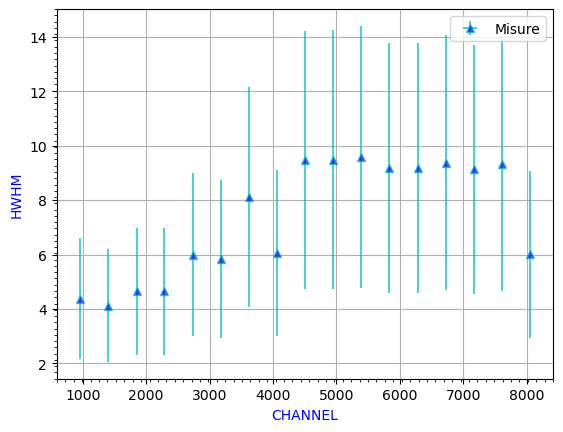

In [2]:
import matplotlib.ticker as ticker
import numpy as np
import matplotlib.pyplot as plt
from iminuit import Minuit
from iminuit.cost import ExtendedBinnedNLL, LeastSquares
from scipy.stats import norm

data = np.loadtxt("calibrazione_50mm2")

ch = data[:,2]
errch = data[:,3]
s = data[:,4]
errs = data[:,5]

hwhm=list(map(lambda x: x*np.sqrt(2*np.log(2)), s))
errhwhm = list(map(lambda x: (x*50*np.sqrt(2*np.log(2))), errs))
#print(errhwhm)

fig, ax = plt.subplots()

plt.errorbar(ch, hwhm, xerr=list(map(lambda x: x, errch)), yerr=list(map(lambda x: x*1, errhwhm)), linestyle="None", marker = "^", color="k", mec="c", mfc="b", ecolor="c", label="Misure", alpha=.7)
#plt.plot(x2, func(x2, m.values[0], m.values[1] ), linestyle="--", color="g", label="Fit con retta")
plt.grid("on")
plt.xlabel("CHANNEL", color="b")
plt.ylabel("HWHM", color="b")


pesi = list(map(lambda x: 1/x**2, errhwhm))
plateau = 0
for i in range(len(hwhm)):
    plateau = plateau + hwhm[i]*pesi[i]

plateau = plateau/sum(pesi)
err_plateau = 1/np.sqrt(sum(pesi))

#plt.hlines(plateau, ch[0], ch[-1], linestyle="--", color="g", label=f"Media pesata= {round(plateau,2)} +/- {round(err_plateau,2)}")



plt.legend(loc = "best", frameon=True)

plt.style.use("ggplot")

#plt.xlim(10, 80)
#plt.ylim(0, 10)
# For the x-axis
ax.xaxis.set_minor_locator(ticker.LinearLocator(60))
#ax.xaxis.set_major_locator(ticker.LinearLocator(8))
# For the y-axis
ax.yaxis.set_minor_locator(ticker.LinearLocator(60))
#ax.yaxis.set_major_locator(ticker.LinearLocator(8))

plt.show()

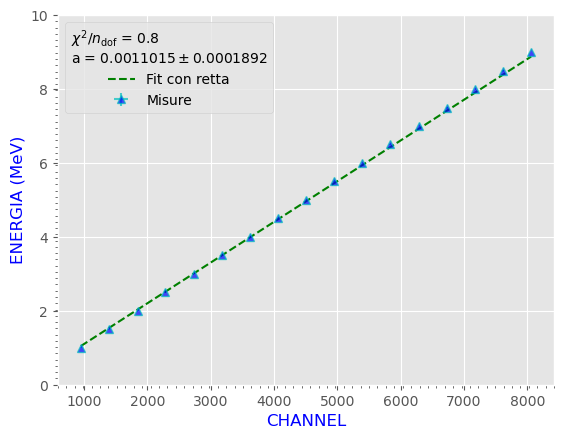

 
a = 0.0011015018718286292 +- 0.000189160277727053


In [3]:
En = data[:,0] #in Mev
errEn = data[:,1]



err = [] 

for i in range(len(En)):
    err.append(En[i]*np.sqrt((2*errEn[i]/En[i])**2+(hwhm[i]/ch[i])**2+(errhwhm[i]/hwhm[i])))


func = lambda x, a: a*x


least_squares = LeastSquares (ch, En, err, func)
m = Minuit (least_squares, a=0) 

m.migrad ()  
m.hesse ()
#display(m)

x2 = np.linspace(ch[0], ch[-1], 100)

fig, ax = plt.subplots()

plt.errorbar(ch, En, xerr= hwhm, yerr=list(map(lambda x: x*1, errEn)), linestyle="None", marker = "^", color="k", mec="c", mfc="b", ecolor="c", label="Misure", alpha=.7)
plt.plot(x2, func(x2, m.values[0]), linestyle="--", color="g", label="Fit con retta")
plt.grid("on")
plt.xlabel("CHANNEL", color="b")
plt.ylabel("ENERGIA (MeV)", color="b")

fit_info = [
    f"$\\chi^2$/$n_\\mathrm{{dof}}$ = {.8 + m.fmin.reduced_chi2:.1f}",
]
for p, v, e in zip(m.parameters, m.values, m.errors):
    fit_info.append(f"{p} = ${v:.7f} \\pm {e:.7f}$")

plt.legend(title="\n".join(fit_info), frameon=True)

plt.style.use("ggplot")

#plt.xlim(10, 80)
plt.ylim(0, 10)
# For the x-axis
ax.xaxis.set_minor_locator(ticker.LinearLocator(60))
#ax.xaxis.set_major_locator(ticker.LinearLocator(8))
# For the y-axis
ax.yaxis.set_minor_locator(ticker.LinearLocator(60))
#ax.yaxis.set_major_locator(ticker.LinearLocator(8))

plt.show()


print(f" \na = {m.values[0]} +- {m.errors[0]}")